# Ananlizing the resulkts of 2MASS coincidences with SySt candidates

In [4]:
import numpy as np
import glob
import json
from pathlib import Path
import matplotlib.pyplot as plt
import splusdata as sp
import seaborn as sn
import pandas as pd
from astropy.table import Table
sn.set_context("poster")

In [5]:
ROOT_PATH = Path("..")  # necessary since we are in the sub-folder

In [6]:
tab = Table.read(ROOT_PATH / "JPLUS-DR2/aper6_mag_idr/2MASS-SySt-pc-Halpha_emitters_threeerror-cleaning-limfilter-limcolor-flags-mask-broad-prob.dat", format="ascii")
tab.info

<Table length=37>
  name   dtype     class     n_bad
------- ------- ------------ -----
     _q   int64       Column     0
RAJ2000 float64       Column     0
DEJ2000 float64       Column     0
 _2MASS   str16       Column     0
   Jmag float64       Column     0
 e_Jmag float64 MaskedColumn     2
   Hmag float64       Column     0
 e_Hmag float64 MaskedColumn     2
   Kmag float64       Column     0
 e_Kmag float64 MaskedColumn     4
   Qflg    str3       Column     0
   Rflg   int64       Column     0
   Bflg   int64       Column     0
   Cflg    str3       Column     0
   Xflg   int64       Column     0
   Aflg   int64       Column     0

In [7]:
#Defining the colours
H_K = tab["Hmag"] - tab["Kmag"]
J_H = tab["Jmag"] - tab["Hmag"]


No handles with labels found to put in legend.


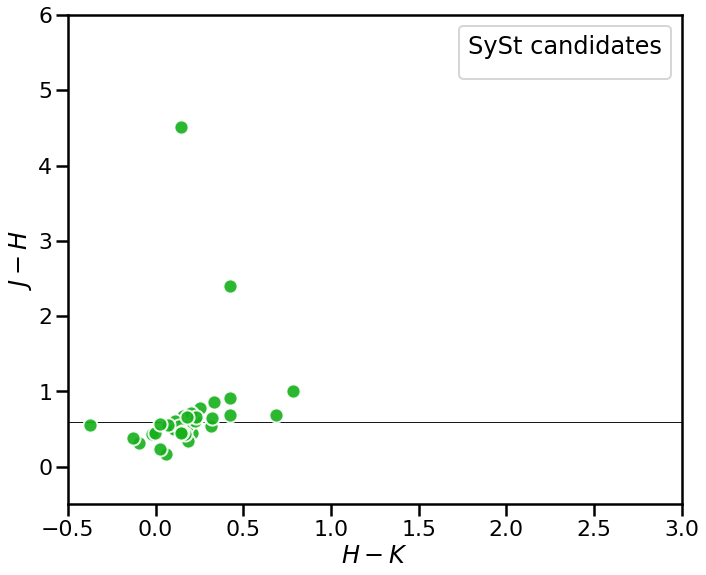

In [80]:
fig, ax = plt.subplots(figsize=(11, 9))
ax.legend(ncol=2).set_title(r"SySt candidates")
ax.set(xlim=[-0.5, 3.0], ylim=[-0.5, 6.0])
#ax.set_aspect("equal")
ax.set(xlabel=r"$H - K$", ylabel=r"$J - H$")
ax.scatter(H_K, J_H,  c=sn.xkcd_rgb['green'], 
                  alpha=0.9, marker='o', s=200, zorder=3, edgecolor='w', cmap="Blues")
#ax.plot(x, y, c="k", lw=0.9)
ax.axhline(y=0.6, c="k", lw=0.9)
#ax.axvline(x=7.87, c="k", lw=0.9)
textbb = {"facecolor": "orange", "alpha": 0.7, "edgecolor": "none"}
textpars = {'ha': 'center', 'va': 'center', 'bbox': textbb, 'fontsize': 'small'}
#ax.text(12, -0.19, r'PN zone', rotation=0, rotation_mode='anchor', **textpars)


In [31]:
# This table included the Jplus magnitudes and the 2MASS magnitudes 
tab1 = Table.read(ROOT_PATH / "JPLUS-DR2/aper6_mag_idr/JPLUSmag-2MASSmag-SySt-pc-Halpha_emitters_threeerror-cleaning-limfilter-limcolor-flags-mask-broad-prob.dat", format="ascii")
tab1.info

<Table length=33>
         name           dtype     class     n_bad
---------------------- ------- ------------ -----
                  Tile   int64       Column     0
                Number   int64       Column     0
                    RA float64       Column     0
                   Dec float64       Column     0
            rSDSS_auto float64       Column     0
            gSDSS_auto float64       Column     0
            iSDSS_auto float64       Column     0
            zSDSS_auto float64       Column     0
            uJAVA_auto float64       Column     0
            J0378_auto float64       Column     0
            J0395_auto float64       Column     0
            J0410_auto float64       Column     0
            J0430_auto float64       Column     0
            J0515_auto float64       Column     0
            J0660_auto float64       Column     0
            J0861_auto float64       Column     0
           rSDSS_PETRO float64       Column     0
           gSDSS_PETRO float64  

In [36]:
#masking
m = tab1["Jmag"] - tab1["Hmag"] >= 0.6

In [37]:
tab1[m]

Tile,Number,RA,Dec,rSDSS_auto,gSDSS_auto,iSDSS_auto,zSDSS_auto,uJAVA_auto,J0378_auto,J0395_auto,J0410_auto,J0430_auto,J0515_auto,J0660_auto,J0861_auto,rSDSS_PETRO,gSDSS_PETRO,iSDSS_PETRO,zSDSS_PETRO,uJAVA_PETRO,J0378_PETRO,J0395_PETRO,J0410_PETRO,J0430_PETRO,J0515_PETRO,J0660_PETRO,J0861_PETRO,rSDSS_MAG_APER_6_0,gSDSS_MAG_APER_6_0,iSDSS_MAG_APER_6_0,zSDSS_MAG_APER_6_0,uJAVA_MAG_APER_6_0,J0378_MAG_APER_6_0,J0395_MAG_APER_6_0,J0410_MAG_APER_6_0,J0430_MAG_APER_6_0,J0515_MAG_APER_6_0,J0660_MAG_APER_6_0,J0861_MAG_APER_6_0,rSDSS_auto_err,gSDSS_auto_err,iSDSS_auto_err,zSDSS_auto_err,uJAVA_auto_err,J0378_auto_err,J0395_auto_err,J0410_auto_err,J0430_auto_err,J0515_auto_err,J0660_auto_err,J0861_auto_err,rSDSS_PETRO_err,gSDSS_PETRO_err,iSDSS_PETRO_err,zSDSS_PETRO_err,uJAVA_PETRO_err,J0378_PETRO_err,J0395_PETRO_err,J0410_PETRO_err,J0430_PETRO_err,J0515_PETRO_err,J0660_PETRO_err,J0861_PETRO_err,rSDSS_MAG_APER_6_0_err,gSDSS_MAG_APER_6_0_err,iSDSS_MAG_APER_6_0_err,zSDSS_MAG_APER_6_0_err,uJAVA_MAG_APER_6_0_err,J0378_MAG_APER_6_0_err,J0395_MAG_APER_6_0_err,J0410_MAG_APER_6_0_err,J0430_MAG_APER_6_0_err,J0515_MAG_APER_6_0_err,J0660_MAG_APER_6_0_err,J0861_MAG_APER_6_0_err,rSDSS_FLAGS,gSDSS_FLAGS,iSDSS_FLAGS,zSDSS_FLAGS,uJAVA_FLAGS,J0378_FLAGS,J0395_FLAGS,J0410_FLAGS,J0430_FLAGS,J0515_FLAGS,J0660_FLAGS,J0861_FLAGS,rSDSS_MASK_FLAGS,gSDSS_MASK_FLAGS,iSDSS_MASK_FLAGS,zSDSS_MASK_FLAGS,uJAVA_MASK_FLAGS,J0378_MASK_FLAGS,J0395_MASK_FLAGS,J0410_MASK_FLAGS,J0430_MASK_FLAGS,J0515_MASK_FLAGS,J0660_MASK_FLAGS,J0861_MASK_FLAGS,P(PN),P(SySt),P(all_else),_q,RAJ2000,DEJ2000,_2MASS,Jmag,e_Jmag,Hmag,e_Hmag,Kmag,e_Kmag,Qflg,Rflg,Bflg,Cflg,Xflg,Aflg,Separation
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,float64,float64,float64,int64,float64,float64,str16,float64,float64,float64,float64,float64,float64,str3,int64,int64,str3,int64,int64,float64
74312,19640,37.0604344193,31.3113086447,12.514,13.309,12.113,11.784,14.701,14.38,14.318,13.919,13.78,13.063,12.223,11.886,12.434,13.203,12.038,11.705,14.592,14.221,14.218,13.75,13.678,12.945,12.159,11.82,14.314,15.188,14.022,13.71,16.289,16.047,16.051,15.851,15.709,14.937,13.709,13.741,0.002,0.005,0.002,0.003,0.031,0.024,0.022,0.014,0.012,0.006,0.003,0.004,0.004,0.007,0.004,0.005,0.043,0.032,0.029,0.019,0.017,0.009,0.005,0.006,0.002,0.004,0.002,0.002,0.014,0.012,0.013,0.01,0.008,0.005,0.003,0.003,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,8.548658611192771e-05,0.7851682676088192,0.21474624580506896,22,37.060312,31.311527,02281447+3118414,12.919,0.065,11.917,0.057,11.132,0.044,EEE,222,111,000,1,0,0.8716016823611169
66854,26899,276.341099807,43.0935751826,17.745,18.393,17.612,17.633,19.916,19.752,19.395,19.175,18.801,18.247,16.835,17.516,17.745,18.393,17.612,17.633,19.916,19.752,19.395,19.175,18.801,18.247,16.835,17.516,17.764,18.399,17.617,17.63,19.934,19.857,19.445,19.198,18.832,18.261,16.831,17.528,0.02,0.031,0.046,0.061,0.196,0.172,0.14,0.104,0.074,0.048,0.02,0.045,0.02,0.031,0.046,0.061,0.196,0.172,0.14,0.104,0.074,0.048,0.02,0.045,0.02,0.03,0.044,0.057,0.186,0.176,0.137,0.099,0.072,0.046,0.019,0.042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0003824987175990152,0.8483081471299514,0.1513093541524496,31,276.341094,43.093708,18252186+4305373,16.458,0.142,15.783,0.175,15.627,--,BCU,220,110,000,0,0,0.4783862749238068
74708,1635

# 74708-16357 Lamost spectrum

I found the lamost spetrum of the objects 74708-16357

In [39]:
from astropy.io import fits

In [40]:
fitsfile = "JPLUS-DR2/aper6_mag_idr/Fig-SySt-pca/spec-56981-HD231600N352358V01_sp05-005.fits"
hdulist= fits.open(ROOT_PATH / fitsfile)

In [43]:
hdulist.info()

Filename: ../JPLUS-DR2/aper6_mag_idr/Fig-SySt-pca/spec-56981-HD231600N352358V01_sp05-005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Flux          1 PrimaryHDU     127   (3909, 5)   float32   


In [44]:
hdulist[0].header

SIMPLE  =                    T /Primary Header created by MWRFITS v1.11b        
BITPIX  =                  -32 /                                                
NAXIS   =                    2 / Number of array dimensions                     
NAXIS1  =                 3909 /                                                
NAXIS2  =                    5 /                                                
EXTEND  =                    T /                                                
                                                                                
COMMENT --------FILE INFORMATION                                                
FILENAME= 'spec-56981-HD231600N352358V01_sp05-005.fits' /                       
OBSID   =            269105005 / Unique number ID of this spectrum              
AUTHOR  = 'LAMOST Pipeline'    / Who compiled the information                   
DATA_V  = 'LAMOST DR5'         / Data release version                           
EXTEN0  = 'Flux, Inverse, Wa

In [47]:
hdulist[0].data

array([[5.1919458e+02, 3.1397217e+02, 2.4115895e+02, ..., 1.8186501e+03,
        1.9068240e+03, 1.8758297e+03],
       [4.6514124e-06, 5.2960709e-06, 5.0270323e-06, ..., 1.0610529e-03,
        9.7203726e-04, 9.7203726e-04],
       [3.6999863e+03, 3.7008384e+03, 3.7016907e+03, ..., 9.0949453e+03,
        9.0970400e+03, 9.0991348e+03],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [67]:
hdu = hdulist[0].data


In [75]:
wl = hdu[2]
Flux = hdu[0]


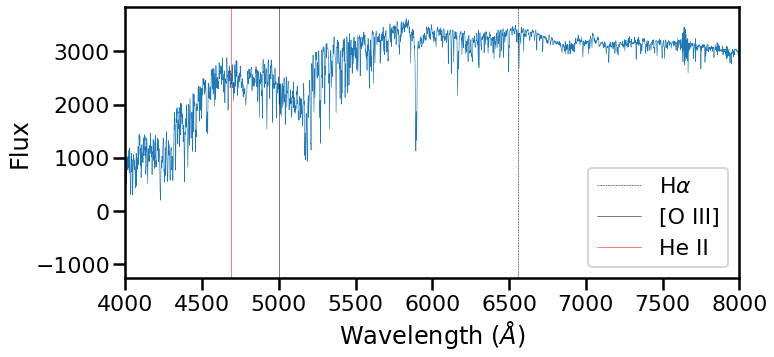

In [98]:
fig1, ax1 = plt.subplots(figsize=(11, 5))
ax1.set(xlim=[4000,8000])
#plt.ylim(ymin=0.0,ymax=5e-15)
ax1.set(xlabel='Wavelength $(\AA)$')
ax1.set(ylabel='Flux')
ax1.plot(wl, Flux, linewidth=0.6)
ax1.axvline(6560.28, color='k', linewidth=0.5, linestyle='--', label=r"H$\alpha$")
ax1.axvline(5000.7, color='k', linewidth=0.5, linestyle='-', label="[O III]")
ax1.axvline(4686, color='r', linewidth=0.5, linestyle='-', label="He II")
ax1.legend()
#gcf().set_size_inches(12,8)